In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt
import scipy.stats as sts

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format for Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb6fa606b80>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Display the row's columns and data in dictionary format for Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb6f6c1a1c0>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [12]:
# Get a list of column names and types for Measurment
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Get a list of column names and types for Station
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

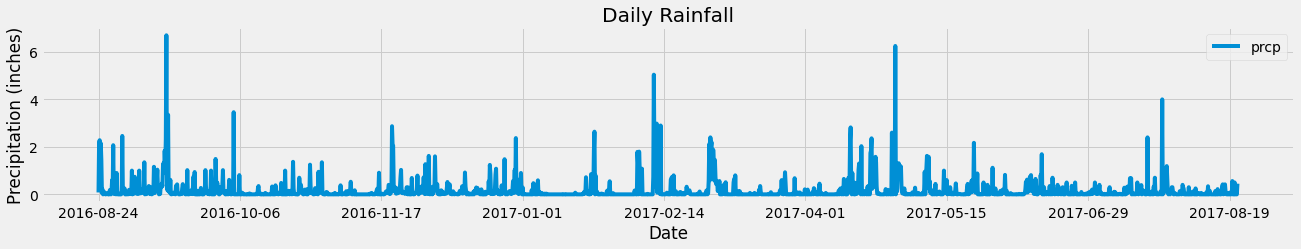

<Figure size 432x288 with 0 Axes>

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Perform a query to retrieve the date and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = DataFrame(date_prcp).set_index('date')

# Drop null values
date_prcp_df = date_prcp_df.dropna(how='any')

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
# Use DataFrame.plot() in order to create a bar chart of the data
date_prcp_df.plot(figsize=(20,3))

# Set a title for the chart
plt.title("Daily Rainfall")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

plt.show()
plt.tight_layout()



In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(desc(func.count(Measurement.station))).\
all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mintemp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').\
    all()

maxtemp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').\
    all()

avgtemp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').\
    all()

print(f'The lowest temperature is', mintemp)
print(f' The highest temperature is', maxtemp)
print(f' The average temperature is', avgtemp)

The lowest temperature is [(54.0,)]
 The highest temperature is [(85.0,)]
 The average temperature is [(71.66378066378067,)]


In [36]:
# Get the most recent date from the most active station
session.query(Measurement.date).order_by(Measurement.date.desc()).\
    filter(Measurement.station =='USC00519281').\
    first()

('2017-08-18')

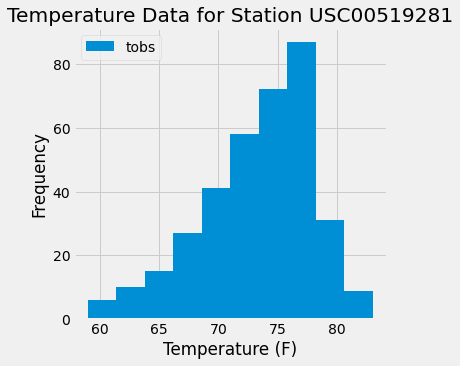

<Figure size 432x288 with 0 Axes>

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the date and precipitation scores
temp_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-18').\
    filter(Measurement.station =='USC00519281').\
    all()

# Save the query results as a Pandas DataFrame and set the index to the date column
temp_df = DataFrame(temp_data).set_index('date')

# Drop null values
temp_df = temp_df.dropna(how='any')

# Use Pandas Plotting with Matplotlib to plot the data
# Use DataFrame.plot() in order to create a bar chart of the data
temp_df.plot(kind='hist', figsize=(5,5), legen)

# Set a title for the chart
plt.title("Temperature Data for Station USC00519281")
plt.xlabel("Temperature (F)")
#plt.ylabel("Precipitation (inches)")

plt.show()
plt.tight_layout()




# Close session

In [ ]:
# Close Session
session.close()